### Least Squares Fitting

Consider a set of data that we need to find a best fit line for.  How do we mathematically and compuationally go about finding that "best fit" line?  One of the first approaches is to use a Least Squares Fitting.

Here is the Wikipedia Explanation of Least Squares Methods:
https://en.wikipedia.org/wiki/Least_squares

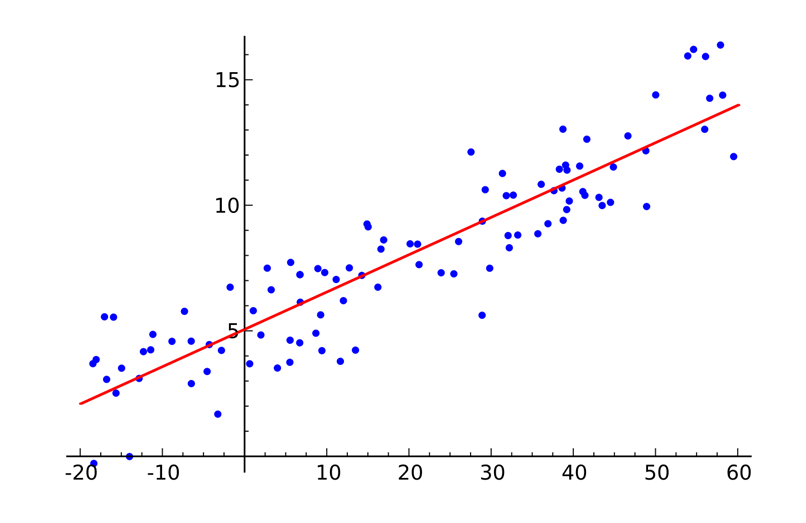

If our goal is to come up with the "Best Fit" what mathematical tool kit is going to be important?

Here is a description of how to calculate the slope and intercept coefficients:

https://www.youtube.com/watch?v=ewnc1cXJmGA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1.1, 2.2, 3.4, 4.8, 5.0, 6, 6.5, 7.3, 8.9, 10.2]

mean_x = np.mean(x)
mean_y = np.mean(y)

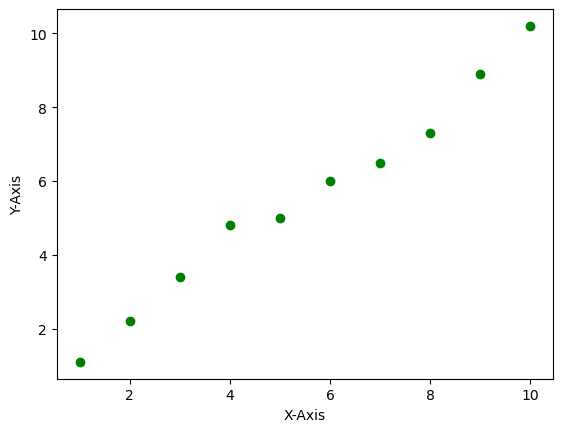

In [5]:
plt.plot(x,y,'go')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

The key to doing a least squares fit is coming up with the slope and the intercept which minimize the sum of distances between the points and the line. The relationship has been derived using calculus and we simply have to implement it here.

In [6]:
#Calculating the slope and the intercept.  This is the fitting routine to a line.
numer = 0
denom = 0
for i in range(len(x)):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
m = numer / denom
b = mean_y - (m * mean_x)
 
# Printing coefficients
print("Coefficients")
print(m, b)

Coefficients
0.9357575757575758 0.39333333333333265


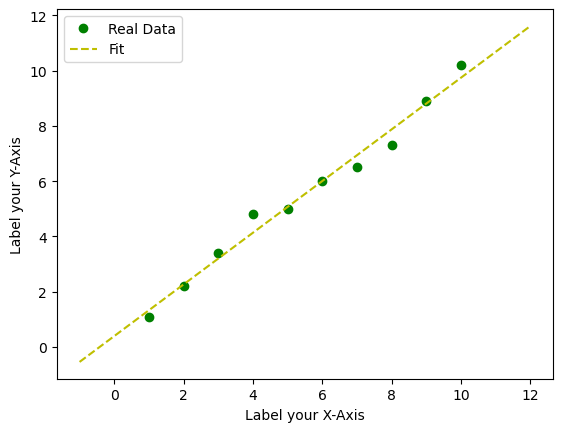

In [7]:
# Plotting Values and Regression Line
max_x = np.max(x) + 2
min_x = np.min(x) - 2
#x = np.array(x)

# Creating best fit line of 1000 equally points
X = np.linspace(min_x, max_x, 1000)
Y = b + m * X

# Ploting the original data
plt.plot(x, y,'go',label='Real Data')
# Ploting our best fit line
plt.plot(X, Y,'y--',label='Fit')
 
plt.xlabel('Label your X-Axis')
plt.ylabel('Label your Y-Axis')
plt.legend()
plt.show()

#### Errors and Residuals

Once we have our fit a question we should ask is what is the quality of the fit.  Two related concepts are the residuals and the errors.

Error is the difference between our measurement and the actual value.  A residual is the difference between our measurement and our model or fit.

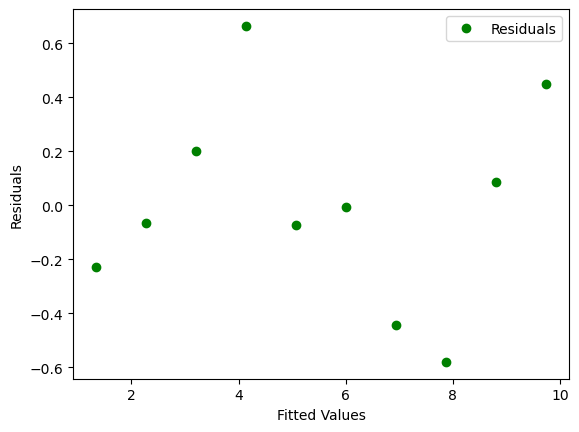

In [8]:
residuals = []
i = 0
while i < len(x):
    residuals.append(y[i] - (b + m*x[i]))
    i = i + 1             
residuals = np.array(residuals)        

y_fit_val = []
i=0
while i < len(x):
    y_fit_val.append((b + m*x[i]))
    i = i + 1
y_fit_val = np.array(y_fit_val)

plt.plot(y_fit_val,residuals,'go', label="Residuals")

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

#### R-Squared Value

A common way to think about the quality of your fit is to consider the R-Squared value.  This is formally known as the coefficient of determination and describes how much of your y-value (dependent variable) is determined by your x-values (independent variables).

Here is a Wikipedia Page that you can use as a resource for R Squared:
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [9]:
# Calculating the R Squared Value

i = 0
sum_sq_T = 0
sum_sq_R = 0
while i < len(x):
    y_val = b + m * x[i]
    sum_sq_T += np.power(y[i] - mean_y,2)
    sum_sq_R += np.power(y[i] - y_val,2)
    i = i+1
R_Sq = 1 - (sum_sq_R/sum_sq_T)
print("R Squared Score")
print(R_Sq)

R Squared Score
0.9825429090975035


#### Root Mean Square Error

Another way to think about the fit is the Root Mean Square Error.  In other words, how much is the sum distance between the actual points and the predicted points.

Here is a Wikipedia Page that you can use as a resource for RMSE:
https://en.wikipedia.org/wiki/Root-mean-square_deviation

In [ ]:
#Calculating the Root Mean Square Error
rmse = 0
for i in range(len(x)):
    y_pred = b + m * x[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(x))
print("RMSE")
print(rmse)